In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv = pd.read_csv("Pokemon.csv")
df = pd.DataFrame(csv)

In [3]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
group = np.column_stack((df['Attack'], df['Sp. Atk'], df['Sp. Def'], df['Speed'], df['Defense'])) #agrupa as variáveis preditoras
group = sm.add_constant(group, prepend=True)
group

array([[   1.,   49.,   65.,   65.,   45.,   49.],
       [   1.,   62.,   80.,   80.,   60.,   63.],
       [   1.,   82.,  100.,  100.,   80.,   83.],
       ..., 
       [   1.,  110.,  150.,  130.,   70.,   60.],
       [   1.,  160.,  170.,  130.,   80.,   60.],
       [   1.,  110.,  130.,   90.,   70.,  120.]])

In [6]:
res = sm.OLS(df["HP"], group).fit() # cria os coeficientes e ajusta o modelo pelo método OLS,
                                    # sendo df["HP"] como var DEPENDENTE

In [7]:
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     60.46
Date:                Sat, 29 Apr 2017   Prob (F-statistic):           2.08e-53
Time:                        22:50:43   Log-Likelihood:                -3597.6
No. Observations:                 800   AIC:                             7207.
Df Residuals:                     794   BIC:                             7235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         31.4832      2.829     11.127      0.000        25.929    37.037
x1             0.2960      0.030      9.883      0.000         0.237     0.355
x2             0.1101      0.031      3.579      0.000         0.050     0.170
x3             0.2644      0.037      7.125      0.000         0.192     0.337
x4            -0.0943      0.032     -2.938      0.003        -0.157    -0.031
x5            -0.0840      0.033     -2.579      0.010        -0.148    -0.020
==============================================================================
Omnibus:                      514.993   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9903.593
Skew:                           2.578   Prob(JB):                         0.00
Kurtosis:                      19.448   Cond. No.                         626.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#adicionando a coluna dos valores preditos à base
p = res.predict(group)
df['Predict_HP'] = pd.Series(p)

In [11]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Predict_HP
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,61.972780
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,68.848385
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,78.693357
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,88.373765
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,56.961473


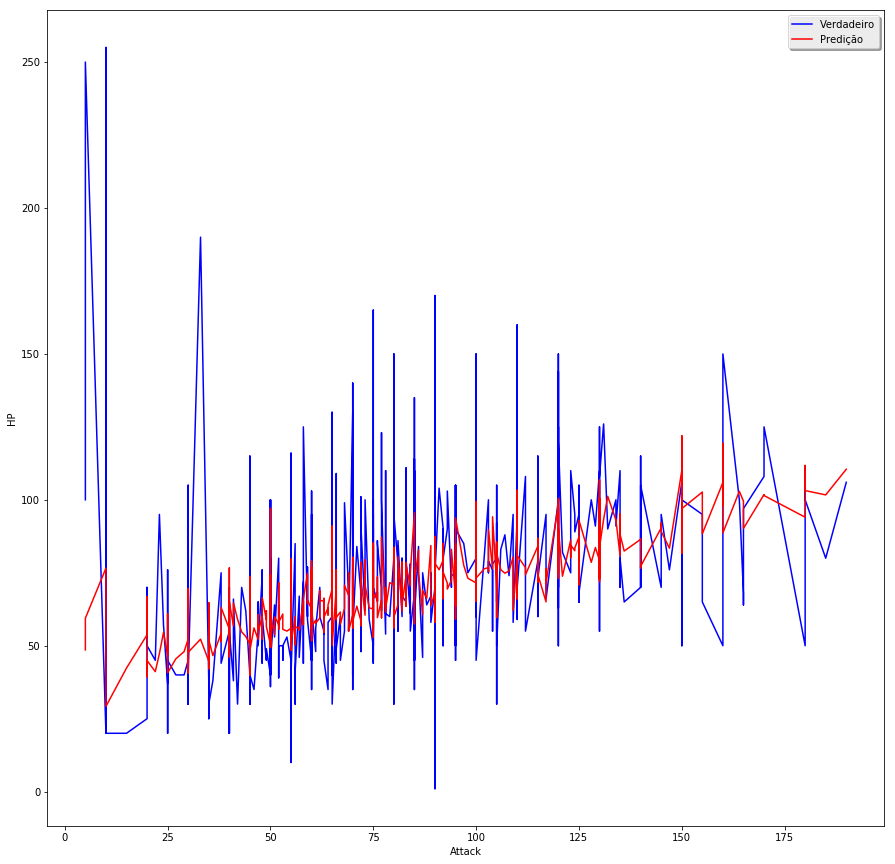

In [12]:
#plotando a coluna de attack com a coluna do HP

#ordenar pela coluna que é a variável independete que será plotada
df_sort = df.sort_values(by="Attack")
plt.figure(figsize=(15,15))
plt.plot(df_sort["Attack"], df_sort["HP"],'b-', label="Verdadeiro")
plt.plot(df_sort["Attack"], df_sort["Predict_HP"],'r', label="Predição")
plt.legend(shadow=True, loc="best")
plt.ylabel("HP")
plt.xlabel("Attack")
plt.show()

In [26]:
#fazer a predição do valor do HP passando os valores que desejo
# df['Attack'], df['Sp. Atk'], df['Sp. Def'], df['Speed'], df['Defense']

print("Tendo estes valores a previsão de HP para este pokemon é "
      "de: {}".format(res.predict([1,100,75,40,50,70])[0]))
# 1=contante, sempre será 1
# attack=100, sp.att=75, sp.def=40, spees=50, defense=70


Tendo estes valores a previsão de HP para este pokemon é de: 69.32690630067177
